In [1]:
import pandas as pd
import numpy as np
import thinkstats2 as ts
import thinkplot as tp

# Poverty breeds necesity therefor greater poverty == greater crime rates
#statquestion

In [2]:
demodf=pd.read_csv('azcitydat.csv')
crimedf=pd.read_csv('crimedata.csv')

In [3]:
#dataset1
#var descriptions
cdat=demodf[['City',
                'Year',
                'Total Population',       
                'Pov Stat :Total', 
                'Pov Stat :Male', 
                'Pov Stat :Female',
                'Income/Poverty level :Total', 
                'Income/Poverty level :Under .50',
                'Income/Poverty level :.50 to .74', 
                'Income/Poverty level :.75 to .99',
                'Income/Poverty level :1.00 to 1.24',
                'Income/Poverty level :1.25 to 1.49',
                'Income/Poverty level :1.50 to 1.74',
                'Income/Poverty level :1.75 to 1.84',
                'Income/Poverty level :1.85 to 1.99',
                'Income/Poverty level :2.00 to 2.99',
                'Income/Poverty level :3.00 to 3.99',
                'Income/Poverty level :4.00 to 4.99',
                'Income/Poverty level :5.00 and over',]]

In [4]:
#dataset2
#var descriptions
cdf=crimedf[['City', 
                'Population', 
                'Violent crime',
                'Robbery',
                'Aggravated assault',
                'Property crime',
                'Burglary', 
                'Larceny-theft',
                'Motor vehicle theft', 
                'year']]

In [5]:
cdat.City.unique()

array(['Avondale city', 'Casas Adobes CDP', 'Chandler city',
       'Flagstaff city', 'Gilbert town', 'Glendale city', 'Goodyear city',
       'Mesa city', 'Peoria city', 'Phoenix city', 'San Tan Valley CDP',
       'Scottsdale city', 'Surprise city', 'Tempe city', 'Tucson city',
       'Yuma city', 'Buckeye city'], dtype=object)

In [6]:
cdf.City.unique()

array(['Apache Junction', 'Buckeye', 'Bullhead City', 'Camp Verde',
       'Casa Grande', 'Chandler', 'Chino Valley', 'Cottonwood',
       'El Mirage', 'Eloy', 'Flagstaff', 'Florence', 'Gilbert',
       'Glendale', 'Goodyear', 'Kingman', 'Marana', 'Mesa', 'Nogales',
       'Oro Valley', 'Paradise Valley', 'Payson', 'Peoria', 'Phoenix',
       'Prescott', 'Sahuarita', 'Scottsdale', 'Sedona', 'Sierra Vista',
       'Somerton', 'Surprise', 'Tempe', 'Tucson', 'Yuma',
       'Lake Havasu City', 'Show Low'], dtype=object)

In [7]:
cities={'Chandler city':'Chandler',  
       'Flagstaff city':'Flagstaff', 'Gilbert town':'Gilbert',
       'Glendale city':'Glendale', 'Goodyear city':'Goodyear',
       'Mesa city':'Mesa', 'Peoria city':'Peoria', 'Phoenix city':'Phoenix',
       'Scottsdale city':'Scottsdale', 'Surprise city':'Surprise', 'Tempe city':'Tempe', 'Tucson city':'Tucson',
       'Yuma city':'Yuma', 'Buckeye city':'Buckeye'}
len(cities)

14

In [8]:
cityPovertyDF=cdat[cdat['City']=='Chandler city']
for city in cities.keys():
    cityPovertyDF=cityPovertyDF.append(cdat[cdat['City']==city])
cityPovertyDF.drop_duplicates(inplace=True)
cityPovertyDF=cityPovertyDF.replace({'City':cities})

cityCDF=cdf[cdf['City']=='Chandler']
for k,v in cities.items():
    cityCDF=cityCDF.append(cdf[cdf['City']==v])
cityCDF.drop_duplicates(inplace=True)

In [9]:
cityCDF.City.unique()==cityPovertyDF.City.unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [10]:
print(cityCDF.year.unique())
cityCDF.head()

[2010 2011 2012 2013 2014 2015 2016 2018 2006 2007 2008 2009 2005]


,City,Population,Violent crime,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,year
5,Chandler,241826.0,691.0,195.0,429.0,7516.0,1373.0,5766.0,377.0,2010
40,Chandler,239466.0,681.0,171.0,446.0,7416.0,1344.0,5741.0,331.0,2011
77,Chandler,242721.0,628.0,149.0,411.0,6571.0,1147.0,5168.0,256.0,2012
113,Chandler,248718.0,575.0,162.0,359.0,5900.0,993.0,4628.0,279.0,2013
148,Chandler,252369.0,466.0,111.0,294.0,5643.0,954.0,4461.0,228.0,2014


In [11]:
cityPovertyDF.head()
cityPovertyDF.columns

Index(['City', 'Year', 'Total Population', 'Pov Stat :Total', 'Pov Stat :Male',
       'Pov Stat :Female', 'Income/Poverty level :Total',
       'Income/Poverty level :Under .50', 'Income/Poverty level :.50 to .74',
       'Income/Poverty level :.75 to .99',
       'Income/Poverty level :1.00 to 1.24',
       'Income/Poverty level :1.25 to 1.49',
       'Income/Poverty level :1.50 to 1.74',
       'Income/Poverty level :1.75 to 1.84',
       'Income/Poverty level :1.85 to 1.99',
       'Income/Poverty level :2.00 to 2.99',
       'Income/Poverty level :3.00 to 3.99',
       'Income/Poverty level :4.00 to 4.99',
       'Income/Poverty level :5.00 and over'],
      dtype='object')

In [12]:
cityPovertyDF['total below poverty line']=cityPovertyDF['Income/Poverty level :Under .50']+cityPovertyDF['Income/Poverty level :.50 to .74']+cityPovertyDF['Income/Poverty level :.75 to .99']
cityPovertyDF['ratio below poverty line']=cityPovertyDF['total below poverty line']/cityPovertyDF['Income/Poverty level :Total']

In [13]:
totalpoverty=cityPovertyDF['Income/Poverty level :Under .50']
for val in ['Income/Poverty level :.50 to .74',
       'Income/Poverty level :.75 to .99',
       'Income/Poverty level :1.00 to 1.24',
       'Income/Poverty level :1.25 to 1.49',
       'Income/Poverty level :1.50 to 1.74',
       'Income/Poverty level :1.75 to 1.84',
       'Income/Poverty level :1.85 to 1.99',
       'Income/Poverty level :2.00 to 2.99',
       'Income/Poverty level :3.00 to 3.99',
       'Income/Poverty level :4.00 to 4.99',
       'Income/Poverty level :5.00 and over']:
    totalpoverty=totalpoverty+cityPovertyDF[val]
#totalpoverty==cityPovertyDF['Income/Poverty level :Total']

In [14]:
cityPovertyDF=cityPovertyDF[['City', 'Year','ratio below poverty line']]

In [15]:
print(cityPovertyDF.Year.unique())

[2011 2012 2013 2014 2015 2016 2017 2018]


In [16]:
cityCrimeDF=cityCDF[cityCDF['year']==2011]
for year in [2012, 2013, 2014 ,2015 ,2016 ,2017, 2018]:
    cityCrimeDF=cityCrimeDF.append(cityCDF[cityCDF['year']==year])
print(cityCrimeDF.shape)


(93, 10)


In [17]:
pd.set_option('precision', 4)

for col in ['Violent crime', 'Robbery', 'Aggravated assault',
       'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft']:
            cityCrimeDF[col]=cityCrimeDF[col]/cityCrimeDF['Population']


In [18]:
renamez={}
for col in ['Violent crime', 'Robbery', 'Aggravated assault',
       'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft']:
    renamez[col]=str(col)+' per capita'
    
cityCrimeDF.rename(columns=renamez,inplace=True)
cityCrimeDF.columns

Index(['City', 'Population', 'Violent crime per capita', 'Robbery per capita',
       'Aggravated assault per capita', 'Property crime per capita',
       'Burglary per capita', 'Larceny-theft per capita',
       'Motor vehicle theft per capita', 'year'],
      dtype='object')

In [19]:
mpbndf=cityCrimeDF.merge(cityPovertyDF,how='left' ,  left_on=['City','year'] , right_on=['City','Year'] )
mpbndf.drop(columns=['year','Population'],inplace=True)
mpbndf.head(130)

,City,Violent crime per capita,Robbery per capita,Aggravated assault per capita,Property crime per capita,Burglary per capita,Larceny-theft per capita,Motor vehicle theft per capita,Year,ratio below poverty line
0,Chandler,0.0028,0.0007,0.0019,0.0310,0.0056,0.0240,0.0014,2011.0,0.1046
1,Flagstaff,0.0039,0.0006,0.0027,0.0450,0.0035,0.0405,0.0010,2011.0,0.2427
2,Gilbert,0.0008,0.0003,0.0005,0.0182,0.0039,0.0137,0.0006,2011.0,0.0715
3,Glendale,0.0048,0.0019,0.0027,0.0641,0.0106,0.0471,0.0063,2011.0,0.1925
4,Goodyear,0.0016,0.0003,0.0010,0.0281,0.0123,0.0142,0.0016,2011.0,0.0827
...,...,...,...,...,...,...,...,...,...,...
88,Surprise,0.0012,0.0003,0.0007,0.0154,0.0017,0.0122,0.0014,2018.0,0.0539
89,Tempe,0.0048,0.0010,0.0029,0.0414,0.0054,0.0331,0.0029,2018.0,0.1745
90,Tucson,0.0074,0.0023,0.0041,0.0495,0.0061,0.0387,0.0048,2018.0,0.2191
91,Yuma,0.0051,0.0006,0.0041,0.0212,0.0042,0.0147,0.0023,2018.0,0.1889


In [20]:
for col in ['Violent crime per capita', 'Robbery per capita',
       'Aggravated assault per capita', 'Property crime per capita',
       'Burglary per capita', 'Larceny-theft per capita',
       'Motor vehicle theft per capita','ratio below poverty line']:
        print('The Mean of ',col,' is', mpbndf[col].mean())
        print('The mode of ',col,' is not valid, no vals are equal')
        print('The spread/std div of ',col,' is', mpbndf[col].std(skipna=True))
        print('The kurtosis of ',col,' is', mpbndf[col].kurtosis(skipna=True))

The Mean of  Violent crime per capita  is 0.0032997783746186557
The mode of  Violent crime per capita  is not valid, no vals are equal
The spread/std div of  Violent crime per capita  is 0.002035148294084441
The kurtosis of  Violent crime per capita  is -1.0589929022273714
The Mean of  Robbery per capita  is 0.0008396605758882034
The mode of  Robbery per capita  is not valid, no vals are equal
The spread/std div of  Robbery per capita  is 0.000663825678652149
The kurtosis of  Robbery per capita  is -0.2177980580093113
The Mean of  Aggravated assault per capita  is 0.0020859275068143552
The mode of  Aggravated assault per capita  is not valid, no vals are equal
The spread/std div of  Aggravated assault per capita  is 0.0013186198641493786
The kurtosis of  Aggravated assault per capita  is -1.1354446421023296
The Mean of  Property crime per capita  is 0.03137207859867097
The mode of  Property crime per capita  is not valid, no vals are equal
The spread/std div of  Property crime per capi

Graph of Violent crime per capita


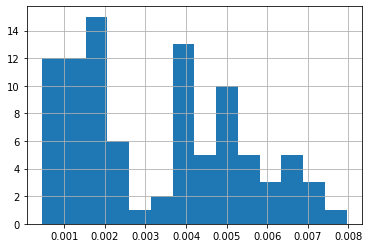

Graph of Robbery per capita


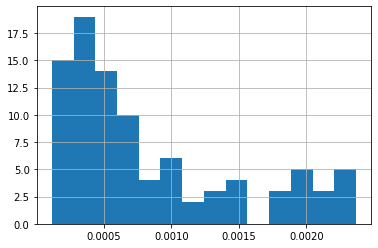

Graph of Aggravated assault per capita


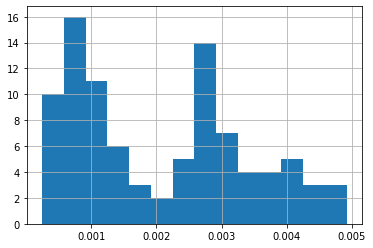

Graph of Property crime per capita


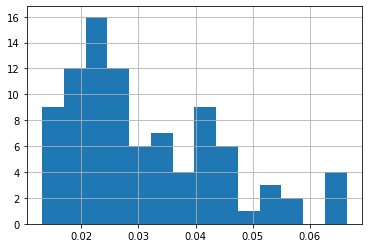

Graph of Burglary per capita


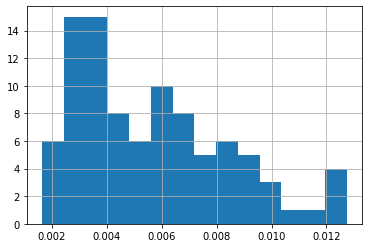

Graph of Larceny-theft per capita


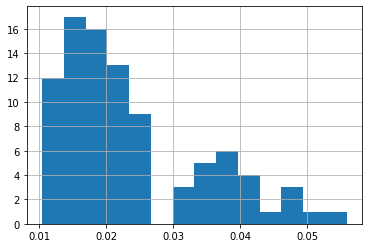

Graph of Motor vehicle theft per capita


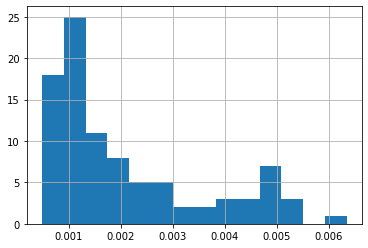

Graph of ratio below poverty line


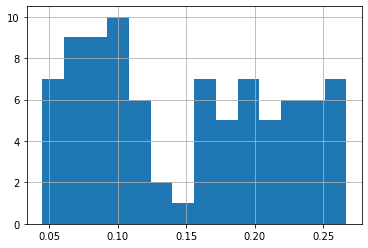

In [21]:
import matplotlib.pyplot as plt
for col in ['Violent crime per capita', 'Robbery per capita',
       'Aggravated assault per capita', 'Property crime per capita',
       'Burglary per capita', 'Larceny-theft per capita',
       'Motor vehicle theft per capita','ratio below poverty line']:
    print('Graph of '+ col)
    mpbndf[col].hist(bins=14,label=str(col))
    plt.show()
#after scaling by population there are not any outliers shown by the histogram

Graph of Violent crime per capita


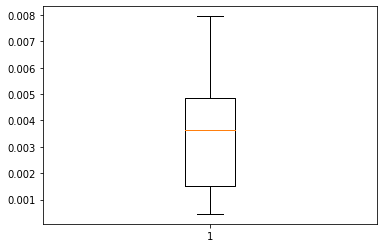

Graph of Robbery per capita


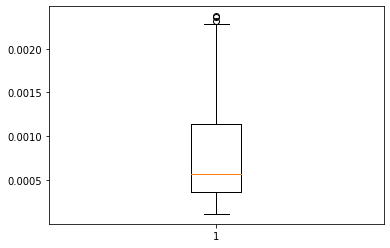

Graph of Aggravated assault per capita


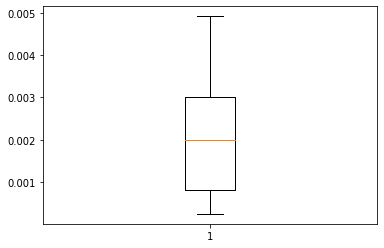

Graph of Property crime per capita


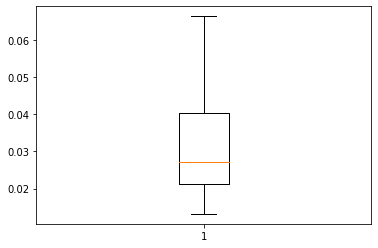

Graph of Burglary per capita


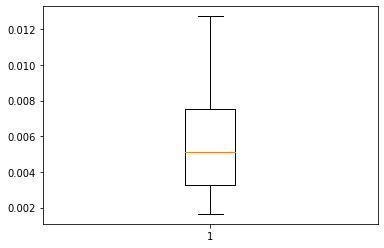

Graph of Larceny-theft per capita


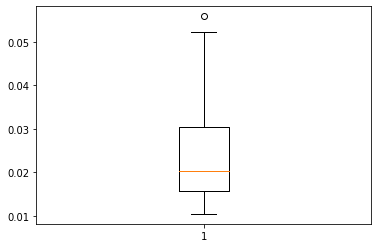

Graph of Motor vehicle theft per capita


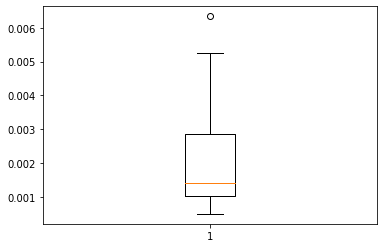

Graph of ratio below poverty line


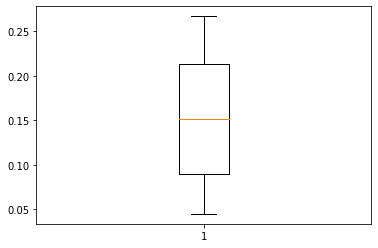

In [22]:
for col in ['Violent crime per capita', 'Robbery per capita',
       'Aggravated assault per capita', 'Property crime per capita',
       'Burglary per capita', 'Larceny-theft per capita',
       'Motor vehicle theft per capita','ratio below poverty line']:
    print('Graph of '+ col)
    plt.boxplot(mpbndf[col].dropna())
    plt.show()
#the boxplots show a few outliers, however this data is informative rather than invalid
#the hypothesis of poverty breeds necessity is looking for bias in the crime data such as
#outliers to correlate with higher proverty rate

In [23]:
def MakePmfFromHist(hist, label=None):

    return ts.Pmf(hist, label=label)

In [24]:
#property crime pmf over and under the mean poverty
m=mpbndf['ratio below poverty line'].mean()
print(m)
pco=mpbndf[mpbndf['ratio below poverty line']>m]
pcu=mpbndf[mpbndf['ratio below poverty line']<m]
pco=pco['Motor vehicle theft per capita'].dropna()
pcu=pcu['Motor vehicle theft per capita'].dropna()
pcu=pcu.append(pd.Series(pcu.mean()))
print(len(pco))
print(len(pcu))


0.14952996633480542
44
44


In [25]:
overpmf=ts.Pmf(pco, label='^ avg MV theft per capita')
underpmf=ts.Pmf(pcu, label='_ avg MV theft per capita')

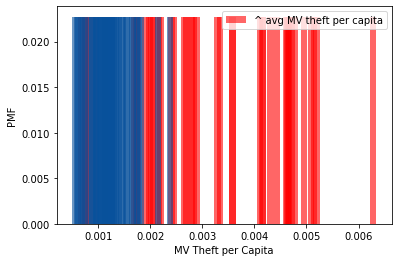

In [26]:
width = 0.0001 / 0.8

# plot PMFs of mv theft over and under poverty linve
tp.PrePlot(2)
tp.Hist(overpmf, align='right', width=width,color='red')
tp.Hist(underpmf, align='left', width=width)
tp.Config(xlabel='MV Theft per Capita', ylabel='PMF')
#not really helpful as values are continious 

{'xscale': 'linear', 'yscale': 'linear'}

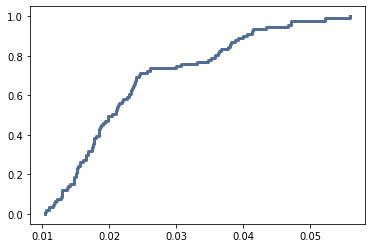

In [27]:
tp.Cdf(ts.Cdf(ts.Pmf(mpbndf['Larceny-theft per capita'])),label = 'Larceny per capita CDF')
# 80% of 'Larceny-theft per capita' is less than 0.025

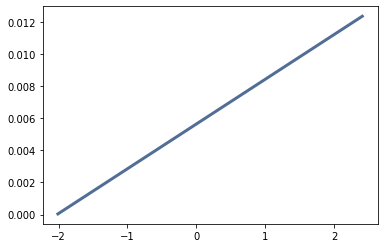

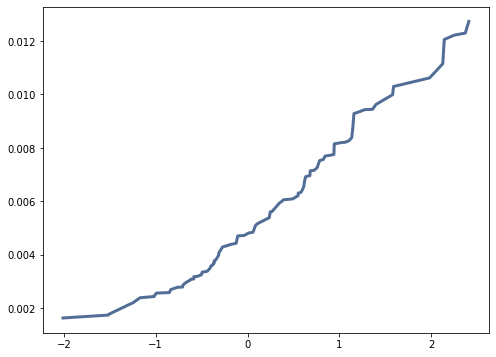

<Figure size 576x432 with 0 Axes>

In [28]:
#Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5)
xs,ys=ts.NormalProbability(mpbndf['Burglary per capita'])
fxs,fys=ts.FitLine(xs,inter=mpbndf['Burglary per capita'].mean(skipna=True),slope=mpbndf['Burglary per capita'].std(skipna=True))
tp.Plot(fxs,fys)
tp.show()
tp.Plot(xs,ys)
tp.show()
# The normal probability plot shows that burglary per kapita is surprisingly close to normal despite the kurtosis
#shown by the histogram
#it also indicates that there are samples of burglary per kapita between .003 and .005 than expected as well
#as a more pronounced deficit between 0.010 and 0.012

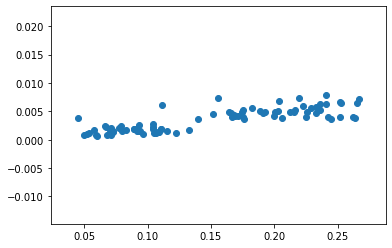

SpearmanrResult(correlation=0.7855580666326456, pvalue=2.083466734145672e-19)


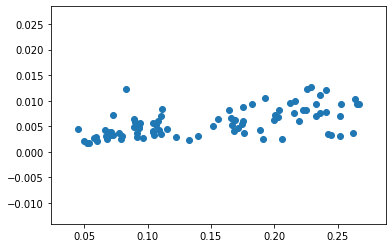

SpearmanrResult(correlation=0.5852956185754902, pvalue=2.6184425815328056e-09)


In [29]:
import scipy.stats as ss
#Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis(Chapter 7).
plt.scatter(mpbndf['ratio below poverty line'],mpbndf['Violent crime per capita'])
#plt.axis('scaled')
plt.show()
#the scatterplot between poverty and violent crime shows a positive correlation 
#although not an incredibly strong corr
a=mpbndf[['ratio below poverty line','Violent crime per capita']].dropna()
print(ss.spearmanr(a[['ratio below poverty line']],a[['Violent crime per capita']]))
#the spearman rank corr is surprisingly strong as well as its p value, the p value is most likely due to the 
#smaller than desired sample size
plt.scatter(mpbndf['ratio below poverty line'],mpbndf['Burglary per capita'])
#plt.axis('scaled')
plt.show()
b=mpbndf[['ratio below poverty line','Burglary per capita']].dropna()
print(ss.spearmanr(b[['ratio below poverty line']],b[['Burglary per capita']]))
#The scatter plot also shows a slightly weaker positive corr between increased poverty and burgalry
# The pvalue shows significance in the correlation
#with the positive correlations 

#causation: both the graphs and the correlation coef have shown that
# poverty may lead to necessity

In [30]:
class DiffMeansPermute(ts.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

Violent crime per capita pval 0.0


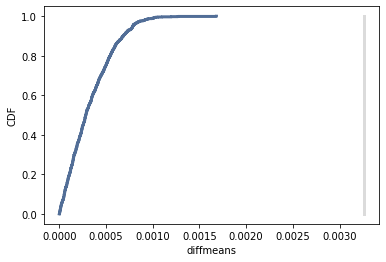

Robbery per capita pval 0.0


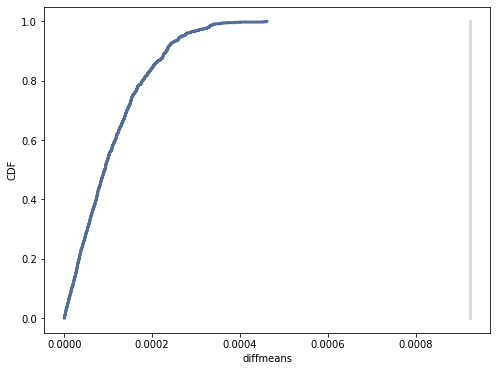

Aggravated assault per capita pval 0.0


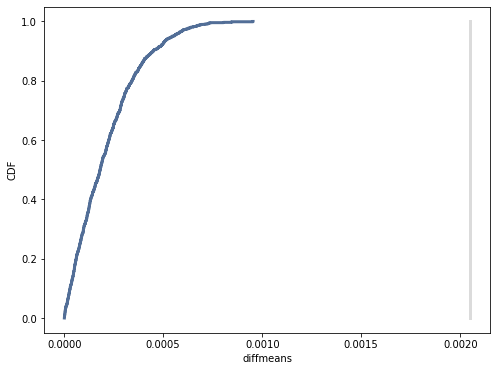

Property crime per capita pval 0.0


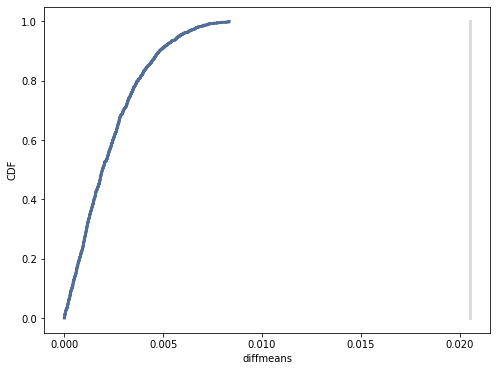

Burglary per capita pval 0.0


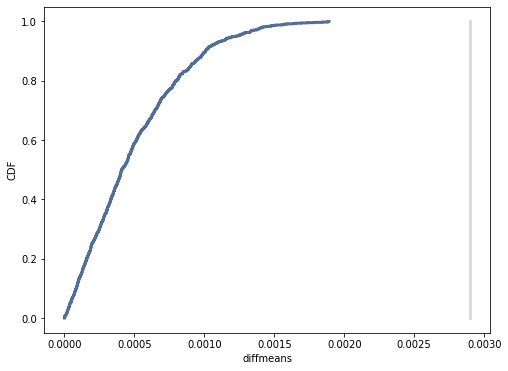

Larceny-theft per capita pval 0.0


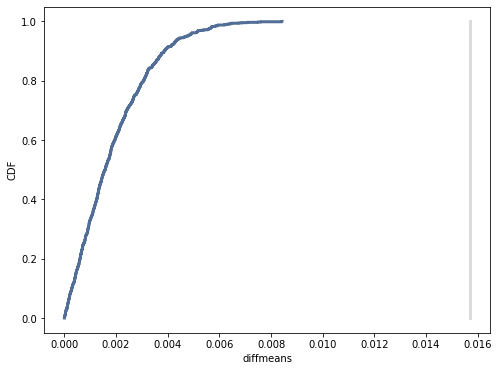

Motor vehicle theft per capita pval 0.0


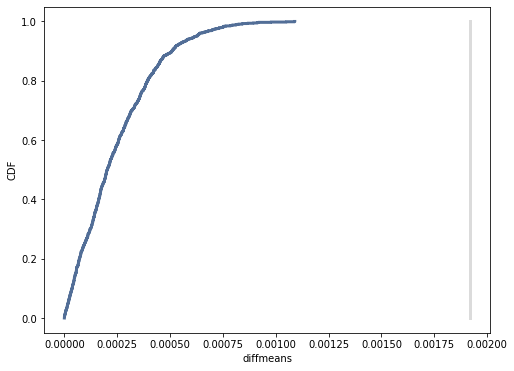

<Figure size 576x432 with 0 Axes>

In [31]:
# hypothesis test using difference in means

pco=mpbndf[mpbndf['ratio below poverty line']>m].dropna()
pcu=mpbndf[mpbndf['ratio below poverty line']<m].dropna()
for i in['Violent crime per capita', 'Robbery per capita',
       'Aggravated assault per capita', 'Property crime per capita',
       'Burglary per capita', 'Larceny-theft per capita',
       'Motor vehicle theft per capita']:
    data=pco[i],pcu[i]
    ht= DiffMeansPermute(data)
    print(i,'pval',ht.PValue())
    ht.PlotCdf()
    tp.Show(xlabel='diffmeans',ylabel='CDF')
    

In [32]:
#multiple regression analysis
import statsmodels.formula.api as smf
mpbndf=mpbndf.rename(columns={'ratio below poverty line':'ratio_below_poverty_line' ,'Violent crime per capita' :'Violent_crime_per_capita' , 'Robbery per capita' :'Robbery_per_capita' ,
       'Aggravated assault per capita' :'Aggravated_assault_per_capita', 'Property crime per capita' :'Property_crime_per_capita' ,
       'Burglary per capita' :'Burglary_per_capita' , 'Larceny-theft per capita' :'Larceny_theft_per_capita' ,
       'Motor vehicle theft per capita':'Motor_vehicle_theft_per_capita'})
mpbndf.columns

Index(['City', 'Violent_crime_per_capita', 'Robbery_per_capita',
       'Aggravated_assault_per_capita', 'Property_crime_per_capita',
       'Burglary_per_capita', 'Larceny_theft_per_capita',
       'Motor_vehicle_theft_per_capita', 'Year', 'ratio_below_poverty_line'],
      dtype='object')

In [33]:

reg=smf.ols('ratio_below_poverty_line ~ Violent_crime_per_capita + Robbery_per_capita +       Aggravated_assault_per_capita  +  Property_crime_per_capita  +        Burglary_per_capita  +  Larceny_theft_per_capita  + Motor_vehicle_theft_per_capita ',data=mpbndf).fit()
reg.summary()
#with an r2 of ..786 the coef of det points towards poverty levels rising with crime
# taking into account the number of indep vars the adj r shows similar explanation
#Violent crime, Roberty, assault all have high standard error values and therefore greater spread/less contribution to the correct regression fit.
#overall it

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     ratio_below_poverty_line   R-squared:                       0.786
Model:                                  OLS   Adj. R-squared:                  0.769
Method:                       Least Squares   F-statistic:                     47.71
Date:                      Wed, 05 Aug 2020   Prob (F-statistic):           4.04e-24
Time:                              01:59:19   Log-Likelihood:                 175.22
No. Observations:                        85   AIC:                            -336.4
Df Residuals:                            78   BIC:                            -319.3
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0208      0.012      1.790      0.077      -0.002       0.044
Violent_crime_per_capita          -3.3948     26.248     -0.129      0.897     -55.650      48.860
Robbery_per_capita                46.2898     35.463      1.305      0.196     -24.312     116.891
Aggravated_assault_per_capita     22.0815     28.869      0.765      0.447     -35.391      79.554
Property_crime_per_capita         -1.9703      1.578     -1.248      0.216      -5.113       1.172
Burglary_per_capita                4.2785      3.026      1.414      0.161      -1.747      10.304
Larceny_theft_per_capita           4.6259      1.571      2.945      0.004       1.499       7.753
Motor_vehicle_theft_per_capita   -10.8747      5.551     -1.959      0.054     -21.925       0.176
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.599
Skew:                          -0.189   Prob(JB):                        0.741
Kurtosis:                       3.161   Cond. No.                     1.33e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.83e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Poverty Breeds Necessity 

During my time as a bachelor's student of Political Science I heard the phrases “Poverty Breeds Necessity” as well as the more popular “Necessity is the mother of all invention”. While these assertions seem similar, they could be said to be the root of two different political ideologies. The Phrase “Poverty Breeds Necessity” has a downtrodden tone but could be interpreted positively either way. “Necessity is the mother of all invention” is the much more upbeat of the two. Without getting into the political aspect of things I wanted to look at the pure statistics of “Poverty breeds necessity”. As a reference point I used census data to examine poverty levels. To look at necessity I took the darker view and utilized crime statistics from the US Department of Justice’s Crime in the United States yearly report. 

With these two sources I extracted variables representing the ratio of residents under the poverty line and counts of crimes both categorized by city and year. The biggest problem here is sample size. Having to match the data from the two sources the number of cities and years contained in both was less than I had hoped for. I believe that this is the biggest failure of the analysis. Had I been able to crawl the entirety of the Department of Justice’s website to pull all the data for all cities in the US in a reasonable manner the issue would have been greatly alleviated. This was made undoable due to the nonstandard presentation and structuring of the Department of Justice’s website.  

Once the data for both were extracted the following was fairly easy. Cleaning and examining the data revealed that the work had already been done. With such crucial statistics even the government was careful to not provide erroneous or false data. The biggest trip up was again the limited number of observations. When preforming a probability mass function this was fully displayed. Each value measured was unique. The probability of a value occurring was equal to all other values. Even though this invalidated the intent of a PMF it still showed the lower poverty rates having a higher concentration around lower rates of motor vehicle theft. The opposite was also true, even more glaringly so. The observations with poverty values greater than the mean value had a much less concentrated wider spread of rate of motor vehicle theft. Lower poverty rate observations were centered around .001 motor vehicle theft with a spread of nearly 0 to 0.0019. Higher poverty rate observations spread from 0.002 all the way to over 0.005 with an outlier all the way at 0.006 or nearly 6 times the rate of motor vehicle theft. 

Without further delving into the minutia of the analysis, the result was fairly one sided. The hypothesis tests and correlation tests allowed the null hypothesis to be rejected. The correlations showed fairly strong correlation and low PValues. The analysis was concluded with the regression that was performed. The multiple regression predicting poverty rate via crimes per capita showed an R2 value of nearly .8 and an adjusted R2 value over .75. This suggests that a large part of poverty rate can be ‘explained’ by the occurrence of crime. With this we can say that poverty and crime are correlated, however we cannot insist that one causes the other. 